## Importando Bibliotecas

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importando o dataset

In [84]:
frame = pd.read_csv('netflix1.csv')
frame

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [85]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [86]:
# Convertendo o tipo da coluna date_added para datetime.
frame = frame.astype({"date_added": "datetime64[ns]"})
frame.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [87]:
rating_list = frame['rating'].value_counts()
rating_list

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [88]:
# Pesquisando quantos filmes não tem diretor atribuído.
frame.loc[frame['director'] == 'Not Given']
directors= frame['director'].value_counts().reset_index(name='contagem')
directors.head(10)

,director,contagem
0,Not Given,2588
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


In [89]:
# Alterando o país Soviet Union para Russia.
count_country = frame['country'].value_counts()
frame.loc[frame['country'] == 'Soviet Union', 'country'] = 'Russia'

In [90]:
# Para que seja mais fácil visualizarmos o gráfico, irei atribuir o país para a sua defida região.
country_to_region = {
    'United States': 'NA',
    'Canada': 'NA',
    'India' : 'APAC',
    'United Kingdom': 'EMEA',
    'Pakistan': 'APAC',
    'West Germany': 'EMEA',
    'Greece': 'EMEA',
    'Zimbabew': 'APAC',
    'Russia': 'EMEA',
    'France': 'EMEA',
    'Brazil': 'LATAM',
    'Mexico': 'LATAM',
    'Colombia': 'LATAM',
    'Peru': 'LATAM',
    'Argentina': 'LATAM',
    'Puerto Rico': 'LATAM',
    'Venezuela': 'LATAM',
    'Paraguay': 'LATAM',
    'Uruguay': 'LATAM',
    'Jamaica': 'LATAM',
    'Guatemala': 'LATAM',
    'Chile': 'LATAM',
    'Switzerland': 'EMEA',
    'Mozambique': 'EMEA',
    'Turkey': 'EMEA',
    'Italy': 'EMEA',
    'Germany': 'EMEA',
    'Poland': 'EMEA',
    'Norway': 'EMEA',
    'Spain': 'EMEA',
    'Sweden': 'EMEA',
    'Ireland': 'EMEA',
    'Ukraine': 'EMEA',
    'Belgium': 'EMEA',
    'Denmark': 'EMEA',
    'Croatia': 'EMEA',
    'Austria': 'EMEA',
    'Czech Republic': 'EMEA',
    'Bulgaria': 'EMEA',
    'Romania': 'EMEA',
    'Finland': 'EMEA',
    'Cyprus': 'EMEA',
    'New Zealand': 'EMEA',
    'Belarus': 'EMEA',
    'Netherlands': 'EMEA',
    'Mauritius': 'EMEA',
    'Jordan': 'EMEA',
    'Zimbabwe': 'EMEA',
    'Portugal': 'EMEA',
    'Egypt': 'EMEA',
    'Senegal': 'EMEA',
    'Cameroon':'EMEA',
    'Namibia': 'EMEA',
    'Ghana': 'EMEA',    
    'Kenya': 'EMEA',
    'Georgia': 'EMEA',
    'Hungary': 'EMEA',
    'Serbia': 'EMEA',
    'Somalia': 'EMEA',
    'Luxembourg': 'EMEA',
    'Slovenia': 'EMEA',
    'Israel': 'APAC',
    'Iceland': 'APAC',
    'Cambodia': 'APAC',
    'Malaysia': 'APAC',
    'Singapore': 'APAC',
    'Hong Kong': 'APAC',
    'Australia': 'APAC',
    'South Korea': 'APAC',
    'Taiwan': 'APAC',
    'Japan': 'APAC',
    'China': 'APAC',
    'Thailand': 'APAC',
    'South Africa': 'APAC',
    'Nigeria': 'APAC',
    'Philippines': 'APAC',
    'Indonesia': 'APAC',
    'Nigeria': 'APAC',
    'Nigeria': 'APAC',
    'Vietnam': 'APAC',
    'Kuwait': 'APAC',
    'Saudi Arabia': 'APAC',
    'Lebanon': 'APAC',
    'Syria': 'APAC',
    'United Arab Emirates': 'APAC',
    'Bangladesh': 'APAC',
    'Iran': 'APAC',
    'Syria': 'APAC',
    'Not Given': 'TBD'
    
}
frame['region'] = frame['country'].map(country_to_region)
frame[['country','region']]

#Confirmando se temos mais algum país que não tem região.
null_region = frame.loc[frame['region'].isna()]
null_region

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,region


In [91]:
# Há a coluna de ratings que consta a classificação indicativa para cada filme e série. Adicionaremos uma coluna description para ficar mais claro o que significa cada classificação.
classificacao_indicativa = {
                            #Classificações de Televisão
                            'TV-MA' : 'Somente para adultos (+18)',
                            'TV-14' : 'Não recomendado para menores de 14 anos',
                            'TV-PG' : 'Supervisão dos pais recomendada',
                            'TV-Y7' : 'A partir de 7 anos',
                            'TV-Y'  : 'Livre para todas as idades',
                            'TV-Y7-FV' : 'A partir de 7 anos, com violência fantasiosa',
                            'TV-G' : 'Público geral',
                            #Classificações de Filmes
                            'R' : 'Menores de 17 anos precisam de acompanhamento dos pais',
                            'PG-13' : 'Pais devem ter cautela para menores de 13 anos',
                            'PG' : 'Supervisão dos pais recomendada',
                            'G' : 'Adequado para todas as idades',
                            'NC-17' : 'Proibido para menores de 18 anos',
                            'NR' : 'Não classificado oficialmente',
                            'UR' : 'Não classificado para distribuição pública'
}
frame['description'] = frame['rating'].map(classificacao_indicativa)
frame[['rating','description']]
frame

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,region,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,NA,Pais devem ter cautela para menores de 13 anos
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",EMEA,Somente para adultos (+18)
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",NA,Somente para adultos (+18)
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",LATAM,Supervisão dos pais recomendada
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",NA,Somente para adultos (+18)
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",EMEA,Supervisão dos pais recomendada
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,NA,A partir de 7 anos
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",APAC,Supervisão dos pais recomendada
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,APAC,Livre para todas as idades


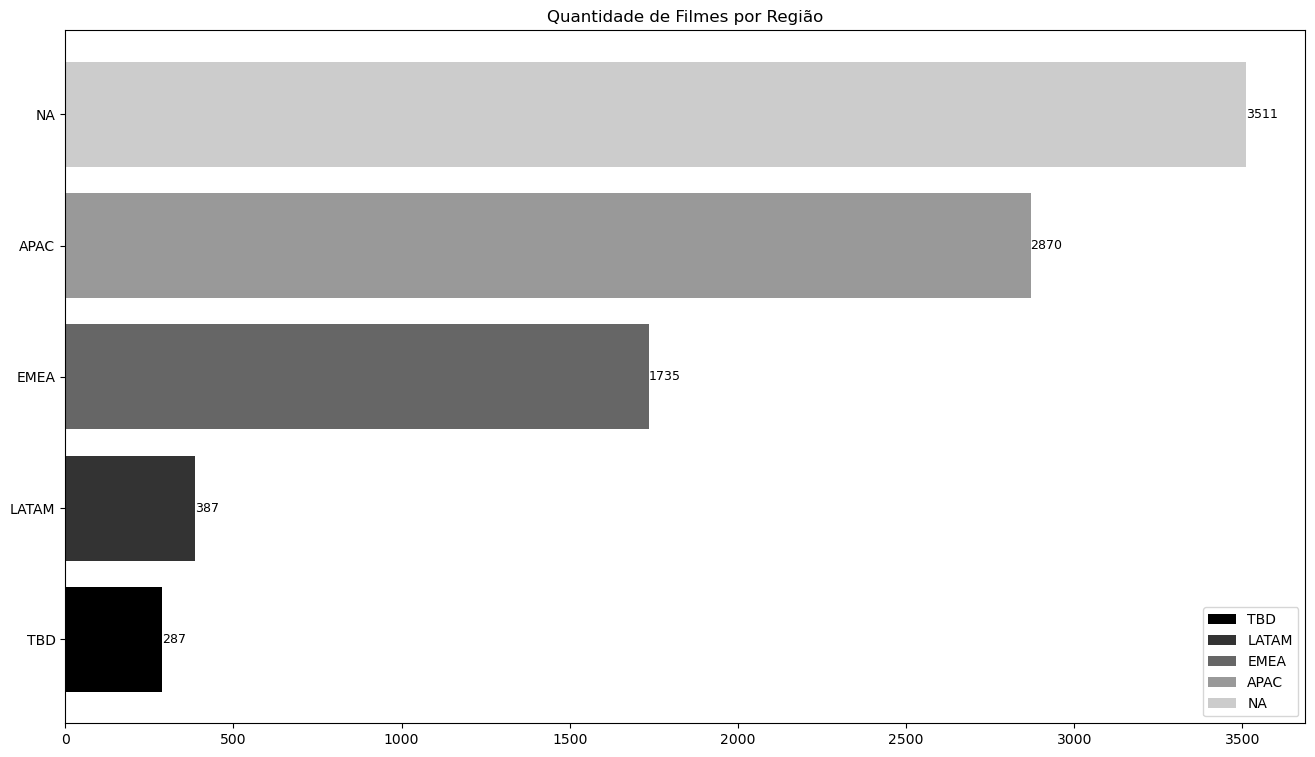

In [92]:
# Criando um dataframe com região e o total de filmes para cada um.a
count = frame['region'].value_counts().reset_index()
# Colocando o nosso dataframe em ordem ascendente.
count_frame = count.sort_values('count')
# nome para as colunas.
count_frame.columns=['region', 'count']
count_frame

#Criando variaveis para armazenar região e a qtd de filmes para cada uma.
Region = count_frame['region']
Qtd = count_frame['count']

# Criando uma lista com diferentes tons de cinza
colors = [str(i/len(Region)) for i in range(len(Region))]

fig, ax = plt.subplots(figsize=(16,9))

bars = ax.barh(Region, Qtd, color=colors)

#Adicionando um título, legenda e rótulo de dados
ax.set_title('Quantidade de Filmes por Região', loc='center')
ax.legend(bars, Region)
ax.bar_label(bars, fontsize=9)

# Plotando o gráfico.
plt.show()

([<matplotlib.patches.Wedge at 0x15fa5681430>,
 [Text(-0.6379462596694288, 0.8961163818242505, 'Movie'),
  Text(0.6379461243596123, -0.8961164781514456, 'TV Show')],
 [Text(-0.3479706870924157, 0.4887907537223184, '69.7%'),
  Text(0.34797061328706125, -0.4887908062644248, '30.3%')])

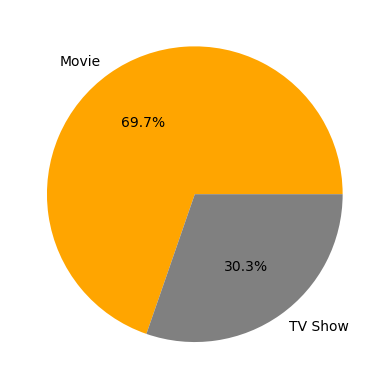

In [93]:
# Vamos criar um novo dataframe para termos os tipos e o total de cada um.
movie_types = frame['type'].value_counts().reset_index()
# nome para as colunas.
movie_types.columns=['type','count']
movie_types

#Criando variaveis para armazenar tipos e o total de cada tipo.
types = movie_types['type']
counts = movie_types['count']

fig, ax = plt.subplots()

ax.pie(counts, labels=types, autopct='%1.1f%%', colors=['orange','gray'])

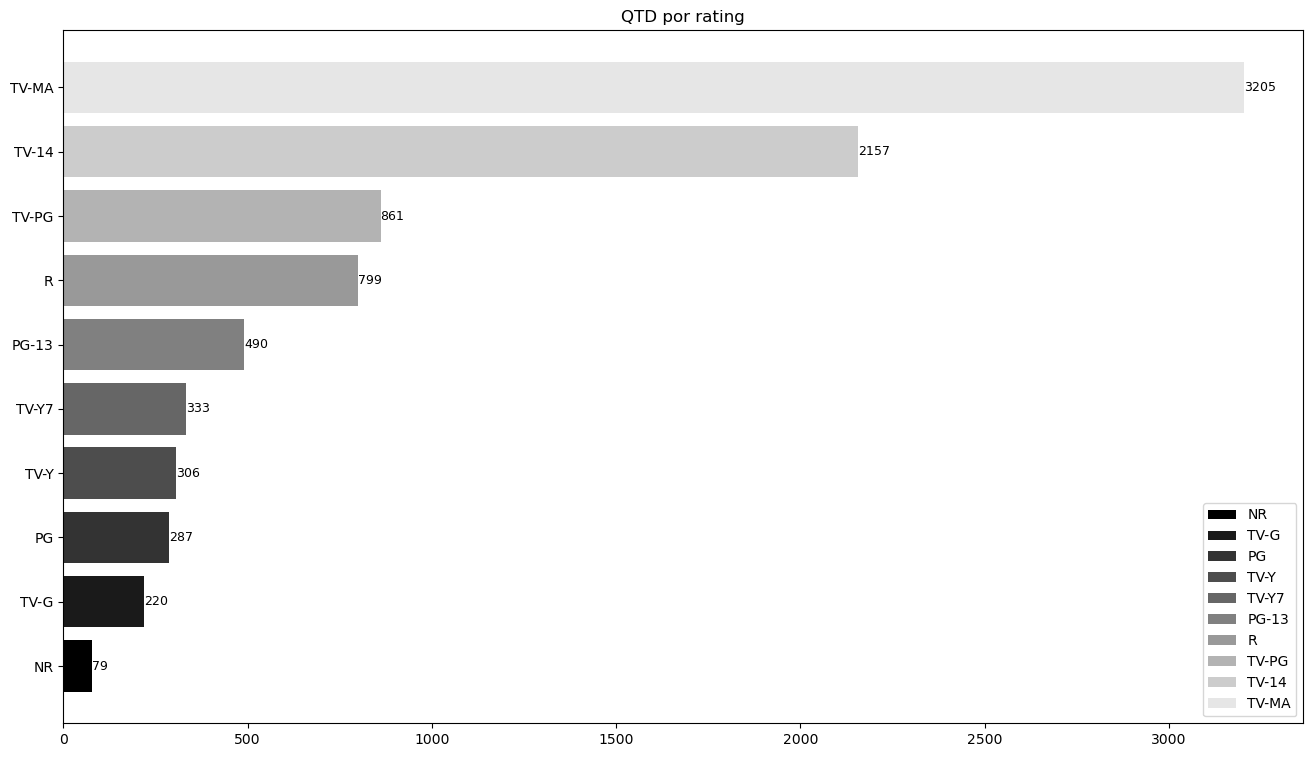

In [94]:
# Avaliações dos filmes. Iremos plotar no gráfico somente os 10 primeiros rating utilizando o iloc.
rating = (frame['rating'].value_counts().reset_index()).iloc[:10]
# Colocando o nosso dataframe em ordem ascendente.
rating = rating.sort_values('count')
# nome para as colunas.
rating.columns = ['rating','count_rating']
rating

rating_all = rating['rating']
count_rating = rating['count_rating']

colors = [str(i/len(rating_all)) for i in range(len(rating_all))]

fig, ax = plt.subplots(figsize=(16,9))
bars = ax.barh(rating_all, count_rating, color=colors)

#Adicionando um título, legenda e rótulo de dados
ax.set_title("QTD por rating", loc="center")
ax.legend(bars, rating_all)
ax.bar_label(bars,fontsize=9)

plt.show()

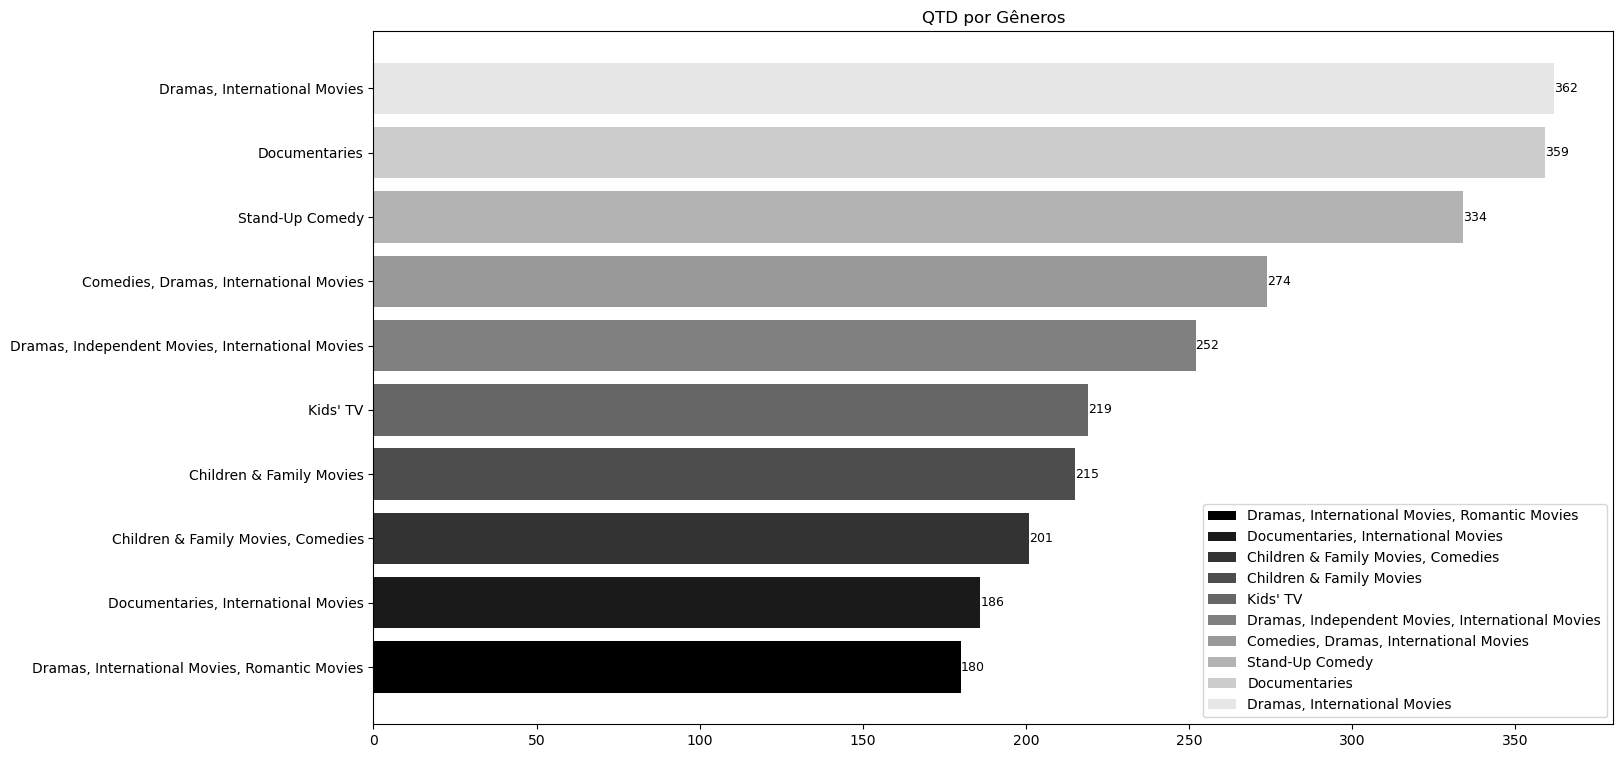

In [95]:
# Avaliações dos filmes. Iremos plotar no gráfico somente os 10 primeiros rating utilizando o iloc.
listed_in = (frame['listed_in'].value_counts().reset_index()).iloc[:10]
# nome para as colunas.
listed_in.columns = ['listed_in','count']
# Colocando o nosso dataframe em ordem ascendente.
listed_in = listed_in.sort_values('count')

genres = listed_in['listed_in']
count = listed_in['count']

colors = [str(i/len(genres)) for i in range(len(genres))]
fig, ax = plt.subplots(figsize=(16,9))

bars = ax.barh(genres, count, color=colors)

#Adicionando um título, legenda e rótulo de dados
ax.set_title("QTD por Gêneros",loc='center')
ax.legend(bars, genres)
ax.bar_label(bars,fontsize=9)
plt.show()